In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
pd.options.mode.use_inf_as_na = True
import warnings
warnings.filterwarnings('ignore')

### Task 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 2006 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [3]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
Energy

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,321000000,10,79
Albania,102000000,35,100
Algeria,1959000000,51,1
American Samoa,NaN,NaN,1
Andorra,9000000,121,89
...,...,...,...
Viet Nam,2554000000,28,45
Wallis and Futuna,0,26,0
Yemen,344000000,13,0


In [4]:
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong",
    "Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
GDP

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2467703911,NaN,NaN,NaN,NaN,NaN
Andorra,4018195654,4021331428,3675727911,3535389133,3346317329,3185604582,3129537612,3127549908,NaN,NaN
Afghanistan,10305228125,11721187594,12144482858,14697331941,15936800636,16911126453,19352203806,19731337261,19990317161,20294152243
Angola,55811028115,68420444001,77874196512,79753199398,82470913121,85702615836,90120963241,96261432368,100886286611,103910558934
Albania,9771760095,10348293942,11127520474,11500292411,11926953259,12231090568,12404772054,12542465022,12793314323,13120823169
...,...,...,...,...,...,...,...,...,...,...
"Yemen, Rep.",26725653163,27617869837,28726558529,29914355174,30906753495,26243421036,26891601654,28009137430,NaN,NaN
South Africa,340285160028,358526057738,369966781590,364276362720,375349442837,387407362601,396007124238,404768205400,411036853169,416311671521
"Congo, Dem. Rep.",16508944145,17542316526,18634483660,19166509369,20523285374,21932132984,23502004277,25500497990,27787759925,29709613590


In [5]:
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15].drop(['Region'],axis=1)
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,303064,301778,3036531,2092737,10,273
United States,2,184851,181106,2623922,819242,14,389
India,3,60257,58589,590570,213760,10,198
Japan,4,52780,52281,557023,132113,11,203
United Kingdom,5,47141,45928,748994,132737,16,244
Germany,6,42343,41464,528645,115432,12,211
Russia,7,39424,39189,142937,67935,4,96
Canada,8,35588,34940,665415,113363,19,246
Italy,9,31260,29959,433388,105641,14,177


In [6]:
subdf=pd.merge(ScimEn,Energy,how='inner',left_index=True,right_index=True)
subdf

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,
China,1,303064,301778,3036531,2092737,10,273,127191000000,93,20
United States,2,184851,181106,2623922,819242,14,389,90838000000,286,12
India,3,60257,58589,590570,213760,10,198,33195000000,26,15
Japan,4,52780,52281,557023,132113,11,203,18984000000,149,10
United Kingdom,5,47141,45928,748994,132737,16,244,7920000000,124,11
Germany,6,42343,41464,528645,115432,12,211,13261000000,165,18
Russia,7,39424,39189,142937,67935,4,96,30709000000,214,17
Canada,8,35588,34940,665415,113363,19,246,10431000000,296,62
Italy,9,31260,29959,433388,105641,14,177,6530000000,109,34


In [7]:
df=pd.merge(subdf,GDP,how='inner',left_index=True,right_index=True)
df.columns=['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,303064,301778,3036531,2092737,10,273,127191000000,93,20,3992331462571,4559041383518,4997775145606,5459247267275,6039658508486,6612490294274,7124977970400,7672447738017,8230120617794,8797998940421
United States,2,184851,181106,2623922,819242,14,389,90838000000,286,12,14792303791800,15055395304800,15011490541400,14594842181900,14964372000000,15204019634600,15542161722300,15773666098800,16156618476000,16548573278300
India,3,60257,58589,590570,213760,10,198,33195000000,26,15,1265894322131,1374865195244,1428360609658,1549482541545,1708458876830,1821872415624,1924235460945,2051981849792,2200616575311,2367206118959
Japan,4,52780,52281,557023,132113,11,203,18984000000,149,10,5496541517363,5617035943771,5558526873314,5251308399909,5498717815810,5473738114222,5569101602926,5644658523313,5642884448582,5669563143141
United Kingdom,5,47141,45928,748994,132737,16,244,7920000000,124,11,2419630700402,2482203235476,2470614405284,2367047611712,2403504326329,2450911011125,2479808627472,2533370110012,2605643189895,2666333396477
Germany,6,42343,41464,528645,115432,12,211,13261000000,165,18,3332890754967,3441560834437,3478809377483,3283339933775,3417298013245,3542371125828,3556723774834,3567317390728,3624386278146,3685555907285
Russia,7,39424,39189,142937,67935,4,96,30709000000,214,17,1385792607183,1504071117741,1583004071092,1459199142720,1524917468442,1589942641764,1645875899596,1666934123163,1678708855071,1616148858034
Canada,8,35588,34940,665415,113363,19,246,10431000000,296,62,1564468853329,1596739898466,1612713061250,1565144676082,1613406134731,1664086754805,1693132927878,1730687770724,1773485821200,1792608764609
Italy,9,31260,29959,433388,105641,14,177,6530000000,109,34,2202169663576,2234626814702,2211154176556,2089937511523,2125184794172,2137439133775,2077184315762,2040871178146,2033867707550,2049315603576
South Korea,10,31200,30949,405923,74753,13,169,11007000000,221,2,941019882149,992431619676,1020509638540,1027729932849,1094499338703,1134795571931,1160809426197,1194429021592,1234340240503,1266580410309


### Task 2
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [8]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
df=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
anotherdf=df.loc[:,'2006':'2015']
anotherdf['avg']=anotherdf.mean(axis=1)
anotherdf['avg'].name='avgGDP'
answer=anotherdf['avg'].sort_values(ascending=False)
answer[0:15]

United States    15364344302990
China             6348608932836
Japan             5542207638235
Germany           3493025339073
France            2681724635762
United Kingdom    2487906661418
Brazil            2189794143775
Italy             2120175089934
India             1769297396604
Canada            1660647466308
Russia            1565459478481
Spain             1418078278146
Australia         1164042729991
South Korea       1106714508245
Mexico            1090990419528
Name: avgGDP, dtype: float64

### Task 3
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [9]:
#according to question 3 answer, we know that the 6th largest avegrage GDP country is UK
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
df=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
anotherdf=df.loc[:,'2006':'2015']
answer=anotherdf.loc['United Kingdom','2015']-anotherdf.loc['United Kingdom','2006']
answer

246702696075.3999

### Task 4
What is the mean energy supply per capita?

*This function should return a single number.*

In [10]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
df=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
espercapita=df.loc[:,'Energy Supply per Capita'].mean()
espercapita

91.85245901639344

### Task 5
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [11]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
df=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
renewable=df.loc[:,'% Renewable'].sort_values(ascending=False)[0:1]
(renewable.index[0],renewable[0])

('Albania', 100.0)

### Task 6
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [12]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country')
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['ratio']=df['Self-citations']/df['Citations']
answer=df['ratio'].sort_values(ascending=False)[0:1]
(answer.index[0],answer[0])

('Antigua and Barbuda', 1.0)

### Task 7

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [13]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country')
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
answer=df['Population'].sort_values(ascending=False)
(answer.index[2])

'United States'

### Task 8
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

In [14]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country')
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
answer=df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
answer

0.568560110312751

### Task 9
Visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita.


<AxesSubplot:xlabel='Citable docs per Capita', ylabel='Energy Supply per Capita'>

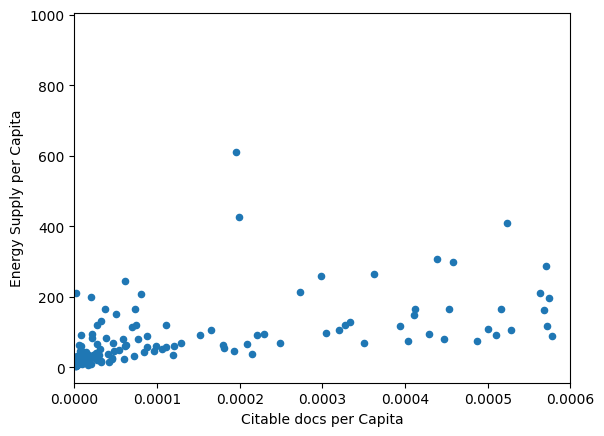

In [15]:
import matplotlib as plt
%matplotlib inline

Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country')
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
Top15 = df
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

### Task 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [16]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15]
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
df['HighRenew'] = np.where(df['% Renewable']>=df['% Renewable'].median(), 1, 0)
df['HighRenew'].name='HighRenew'
df['HighRenew'].sort_index
df['HighRenew']

Australia         0
Brazil            1
Canada            1
China             1
France            1
Germany           1
India             0
Iran              0
Italy             1
Japan             0
South Korea       0
Russia            1
Spain             1
United Kingdom    0
United States     0
Name: HighRenew, dtype: int32

### Task 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russia':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [17]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15]
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
df['HighRenew'] = np.where(df['% Renewable']>=df['% Renewable'].median(), 1, 0)
df = df.rename(index = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russia':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'})
#df.reset_index().groupby('index')
anotherdf = df.reset_index().groupby('index')['Population'].agg([np.size, np.sum, np.mean])
anotherseries =df.reset_index().groupby('index')['Population'].std(ddof=0)
subdf=anotherdf
subdf['std'] = anotherseries
subdf.index.name='Continent'
subdf

,size,sum,mean,std
Continent,,,,
Asia,5,2898666387,579733277,607403617
Australia,1,23316017,23316017,0
Europe,6,457929667,76321611,31628848
North America,2,352855249,176427625,141187760
South America,1,205915254,205915254,0


### Task 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [18]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15]
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
df['HighRenew'] = np.where(df['% Renewable']>=df['% Renewable'].median(), 1, 0)
df = df.rename(index = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russia':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}).reset_index()
groups = df.groupby(['index', pd.cut(df['% Renewable'], 5)])
result = groups.count()['Energy Supply'].dropna()
result.index.name='Continent'
#grouped = df.reset_index().groupby('index')['% Renewable'].groupby(bins)
result

index          % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
Name: Energy Supply, dtype: int64

### Task 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [19]:
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15]
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
df['Population']=df['Energy Supply']/df['Energy Supply per Capita']
df['Citable docs per Capita']=df['Citable documents']/df['Population']
df['HighRenew'] = np.where(df['% Renewable']>=df['% Renewable'].median(), 1, 0)
df['PopEst'] = df['Population'].map('{:,.2f}'.format)
df['PopEst'].name='PopEst'
df['PopEst']

Australia            23,316,017.32
Brazil              205,915,254.24
Canada               35,239,864.86
China             1,367,645,161.29
France               63,837,349.40
Germany              80,369,696.97
India             1,276,730,769.23
Iran                 77,075,630.25
Italy                59,908,256.88
Japan               127,409,395.97
South Korea          49,805,429.86
Russia              143,500,000.00
Spain                46,443,396.23
United Kingdom       63,870,967.74
United States       317,615,384.62
Name: PopEst, dtype: object

### Task 14
Final visualisation.

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


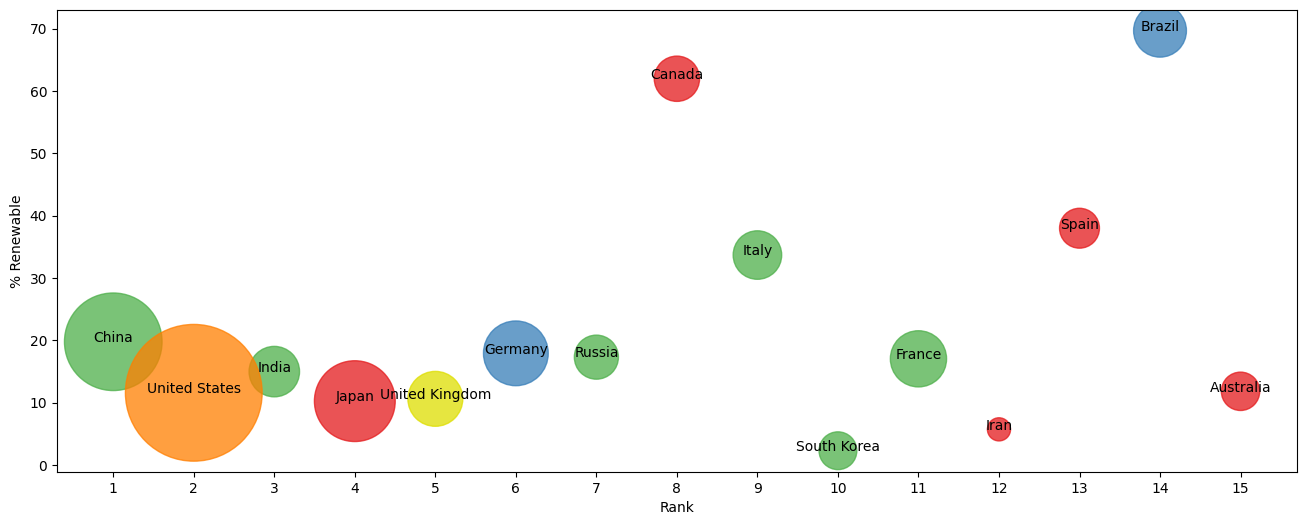

In [20]:
import matplotlib as plt
%matplotlib inline
Energy=pd.read_excel('assets/Energy Indicators.xls',usecols=[2,3,4,5],skiprows = 18,skipfooter=38,header=None,
                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values='...')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
pd.options.display.float_format = '{:.0f}'.format
Energy.fillna(value=np.NaN)
Energy=Energy.replace(to_replace={"China2":'China',
"China, Macao Special Administrative Region4":"Macao",
"Bonaire, Sint Eustatius and Saba":"Caribbean Netherlands",
"Democratic People's Republic of Korea":"North Korea",
"Denmark5":"Denmark",
"France6":"France",                                  
"Falkland Islands (Malvinas)":"Falkland Islands",
"Greenland7":"Greenland",
"Indonesia8":"Indonesia",
"Iran (Islamic Republic of)":"Iran",
"Italy9":"Italy",
"Japan10":"Japan",
"Kuwait11":"Kuwait",
"Lao People's Democratic Republic":"Laos",
"Micronesia (Federated States of)":"Micronesia",
"Netherlands12":"Netherlands",
"Portugal13":"Portugal",
"Republic of Moldova":"Moldova",
"Russian Federation":"Russia",
"Saudi Arabia14":"Saudi Arabia",
"Serbia15":"Serbia",
"Sint Maarten (Dutch part)":"Sint Maarten",
"Spain16":"Spain",
"State of Palestine":"Palestine",
"Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"North Macedonia",
"Ukraine18":"Ukraine",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"United Republic of Tanzania":"Tanzania",
"Venezuela (Bolivarian Republic of)":"Venezuala",
"Wallis and Futuna Islands":"Wallis and Futuna",                                  
"Republic of Korea": "South Korea",
"United States of America20": "United States",
"China, Hong Kong Special Administrative Region3": "Hong Kong",
'Bolivia (Plurinational State of)':'Bolivia','Switzerland17':'Switzerland',
'Australia1':'Australia'})
Energy=Energy.set_index('Country')
GDP=pd.read_csv("assets/world_bank.csv",skiprows=4)
GDP=GDP.replace(to_replace={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong",
"Russian Federation":"Russia"})
sub=GDP.set_index('Country Name')
GDP=sub.loc[:,'2006':'2015']
subdf=pd.merge(Energy,GDP,how='inner',left_index=True,right_index=True)
ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.replace(to_replace={"Russian Federation":"Russia"})
ScimEn=ScimEn.set_index('Country').iloc[0:15]
df=pd.merge(subdf,ScimEn,how='inner',left_index=True,right_index=True)
Top15 = df
ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                   '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);
for i, txt in enumerate(Top15.index):
    ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')
print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

## Finished by Pham Duong Hoang Vu on November 1st, 2022.